### Preprocessing

In [160]:
INPUT_PATH = 'training.txt'
TESTING_PATH = 'test.txt'

In [161]:
list_of_data = list()
file = open(INPUT_PATH, 'r')
for line_of_each_record in file.readlines():
#     print(line_of_each_record)
    list_of_attr_str = line_of_each_record[1:-2].split(',')
    tmp_dict = dict()
    for attr in list_of_attr_str:
        kv_pair = attr.split()
        tmp_dict[kv_pair[0]] = kv_pair[1]
    list_of_data.append(tmp_dict)

In [162]:
list_of_data

[{'1': '1', '3': '39', '4': '100000'},
 {'0': 'M', '2': 'Gold', '3': '85', '4': '80000'},
 {'0': 'M', '1': '1', '2': 'Gold', '3': '90', '4': '20000'},
 {'2': 'Normal', '3': '31', '4': '20000'},
 {'0': 'M', '3': '49', '4': '40000'},
 {'0': 'M', '1': '2', '2': 'Silver', '3': '58', '4': '40000'},
 {'0': 'M', '1': '1', '3': '51', '4': '60000'},
 {'3': '78', '4': '40000'},
 {'0': 'M', '1': '2', '3': '21', '4': '80000'},
 {'0': 'M', '1': '3', '2': 'Gold', '3': '51', '4': '100000'},
 {'1': '1', '3': '33', '4': '120000'},
 {'2': 'Normal', '3': '29', '4': '80000'},
 {'1': '1', '3': '25', '4': '60000'},
 {'0': 'M', '1': '1', '3': '88', '4': '60000'},
 {'0': 'M', '1': '1', '2': 'Normal', '3': '59', '4': '20000'},
 {'1': '1', '3': '81', '4': '60000'},
 {'1': '3', '2': 'Normal', '3': '72', '4': '40000'},
 {'1': '1', '3': '86', '4': '40000'},
 {'1': '1', '2': 'Normal', '3': '47', '4': '80000'},
 {'0': 'M', '1': '1', '3': '26', '4': '40000'},
 {'0': 'M', '1': '1', '2': 'Silver', '3': '82', '4': '4000

In [163]:
import numpy as np
import pandas as pd

In [164]:
df = pd.DataFrame(list_of_data)
df[['0']] = df[['0']].fillna(value='S')
df[['1']] = df[['1']].fillna(value='0')
df[['2']] = df[['2']].fillna(value='Basic')
df["3"] = pd.to_numeric(df["3"])

In [165]:
df

,0,1,2,3,4
0,S,1,Basic,39,100000
1,M,0,Gold,85,80000
2,M,1,Gold,90,20000
3,S,0,Normal,31,20000
4,M,0,Basic,49,40000
5,M,2,Silver,58,40000
6,M,1,Basic,51,60000
7,S,0,Basic,78,40000
8,M,2,Basic,21,80000
9,M,3,Gold,51,100000


In [166]:
def column_filter(col_name, condiction):
    return df[col_name] == condiction

def column_range_filter(col_name, lower, upper):
    return (df[col_name] >= lower) & (df[col_name] <= upper)

list_of_member = ['Basic', 'Normal', 'Silver', 'Gold']
list_of_status = ['S', 'M']
list_of_num_child = ['0', '1', '2', '3', '4', '5']
list_of_age = [[20, 35], [36, 53], [54, 70], [71, 90]]
list_of_income = ['20000', '40000', '60000', '80000', '100000', '120000', '140000', '160000']

In [167]:
Likelihood_Table_of_marital_status = np.zeros((2, 4))
####     Basic Normal Silver Gold
#### S
#### M

for idx, val in enumerate(list_of_member):
    for idx1, val1 in enumerate(list_of_status):
        Likelihood_Table_of_marital_status[idx1][idx] = len(df[column_filter('0', val1) & column_filter('2', val)]) / df['2'].value_counts()[val]

In [168]:
Likelihood_Table_of_num_children = np.zeros((6, 4))
####     Basic Normal Silver Gold
#### 0
#### 1
#### 2
#### 3
#### 4
#### 5

for idx, val in enumerate(list_of_member):
    for idx1, val1 in enumerate(list_of_num_child):
        Likelihood_Table_of_num_children[idx1][idx] = len(df[column_filter('1', val1) & column_filter('2', val)]) / df['2'].value_counts()[val]

In [169]:
Likelihood_Table_of_age = np.zeros((4, 4))
####            Basic Normal Silver Gold
#### 20~35
#### 36~53
#### 54~70
#### 71~90

for idx, val in enumerate(list_of_member):
    for idx1, val1 in enumerate(list_of_age):
        Likelihood_Table_of_age[idx1][idx] = len(df[column_range_filter('3', val1[0], val1[1]) & column_filter('2', val)]) / df['2'].value_counts()[val]

In [170]:
Likelihood_Table_of_income = np.zeros((8, 4))
####            Basic Normal Silver Gold
#### 20000
#### 40000
#### 60000
#### 80000
#### 100000
#### 120000
#### 140000
#### 160000

for idx, val in enumerate(list_of_member):
    for idx1, val1 in enumerate(list_of_income):
        Likelihood_Table_of_income[idx1][idx] = len(df[column_filter('4', val1) & column_filter('2', val)]) / df['2'].value_counts()[val]

In [171]:
def convert_np_array_to_2d_dict(row_attr, col_attr, np_arr):
    tmp_dict = dict()
    for idx, val in enumerate(row_attr):
        tmp_dict2 = dict()
        for idx1, val1 in enumerate(col_attr):
            tmp_dict2[val1] = np_arr[idx][idx1]
        if type(val) == list:
            tmp_dict[tuple(val)] = tmp_dict2
        else:
            tmp_dict[val] = tmp_dict2
    return tmp_dict

In [172]:
dict_likelihood_marital_status = convert_np_array_to_2d_dict(list_of_status, list_of_member, Likelihood_Table_of_marital_status)
dict_likelihood_num_children = convert_np_array_to_2d_dict(list_of_num_child, list_of_member, Likelihood_Table_of_num_children)
dict_likelihood_age = convert_np_array_to_2d_dict(list_of_age, list_of_member, Likelihood_Table_of_age)
dict_likelihood_income = convert_np_array_to_2d_dict(list_of_income, list_of_member, Likelihood_Table_of_income)
dict_probability_member = dict()
for item in list_of_member:
    dict_probability_member[item] = df['2'].value_counts()[item] / len(df['2'])

### Predict

In [173]:
list_of_test_data = list()
file = open(TESTING_PATH, 'r')
for line_of_each_record in file.readlines():
#     print(line_of_each_record)
    list_of_attr_str = line_of_each_record[1:-2].split(',')
    tmp_dict = dict()
    for attr in list_of_attr_str:
        kv_pair = attr.split()
        tmp_dict[kv_pair[0]] = kv_pair[1]
    list_of_test_data.append(tmp_dict)
list_of_test_data

[{'0': 'M', '1': '1', '3': '59', '4': '60000'},
 {'1': '3', '2': 'Silver', '3': '43', '4': '160000'},
 {'0': 'M', '1': '2', '3': '52', '4': '120000'},
 {'0': 'M', '1': '2', '2': 'Normal', '3': '30', '4': '60000'},
 {'3': '73', '4': '60000'},
 {'1': '1', '2': 'Silver', '3': '53', '4': '40000'},
 {'0': 'M', '2': 'Silver', '3': '24', '4': '60000'},
 {'0': 'M', '1': '2', '2': 'Silver', '3': '50', '4': '40000'},
 {'1': '1', '3': '46', '4': '140000'},
 {'0': 'M', '1': '2', '3': '21', '4': '40000'},
 {'1': '2', '3': '83', '4': '80000'},
 {'1': '2', '3': '39', '4': '40000'},
 {'0': 'M', '1': '2', '3': '55', '4': '40000'},
 {'1': '4', '2': 'Gold', '3': '25', '4': '60000'},
 {'3': '50', '4': '40000'},
 {'1': '1', '3': '65', '4': '80000'},
 {'0': 'M', '1': '1', '3': '38', '4': '40000'},
 {'0': 'M', '3': '72', '4': '80000'},
 {'0': 'M', '1': '4', '2': 'Normal', '3': '48', '4': '120000'},
 {'0': 'M', '1': '1', '3': '53', '4': '40000'},
 {'1': '2', '2': 'Gold', '3': '52', '4': '40000'},
 {'0': 'M', 

In [174]:
list_of_answer = list()
list_of_predict = list()
for dict_of_each_record in list_of_test_data:
    tmp_list = list()
    key_two_val = dict_of_each_record.get('2', 'Basic')
    list_of_answer.append(key_two_val)
    for idx, val in enumerate(list_of_member):
        tmp_probability = 1 
        key_zero_val = dict_of_each_record.get('0', 'S')
        tmp_probability *= dict_likelihood_marital_status[key_zero_val][val]
        key_one_val = dict_of_each_record.get('1', '0')
        tmp_probability *= dict_likelihood_num_children[key_one_val][val]
    
        key_three_val_raw = dict_of_each_record.get('3', '')
        if int(key_three_val_raw) >= 20 and int(key_three_val_raw) <= 35:
            key_three_val = tuple([20, 35])
        elif int(key_three_val_raw) >= 36 and int(key_three_val_raw) <= 53:
            key_three_val = tuple([36, 53])
        elif int(key_three_val_raw) >= 54 and int(key_three_val_raw) <= 70:
            key_three_val = tuple([54, 70])
        elif int(key_three_val_raw) >= 71 and int(key_three_val_raw) <= 90:
            key_three_val = tuple([71, 90])
        tmp_probability *= dict_likelihood_age[key_three_val][val]
        key_four_val = dict_of_each_record.get('4', '')
        tmp_probability *= dict_likelihood_income[key_four_val][val]
        
        tmp_probability *= dict_probability_member[val]
        tmp_list.append(tmp_probability)
    list_of_predict.append(tmp_list)

In [175]:
def calculate_accuracy(answer_list, prdict_list):
    correct_count = 0
    for idx, answer in enumerate(answer_list):
        if list_of_member[prdict_list[idx].index(max(prdict_list[idx]))] == answer:
            correct_count += 1
    return correct_count / len(answer_list)

### Result

In [176]:
calculate_accuracy(list_of_answer, list_of_predict)

0.7109004739336493

### Tmp

In [177]:
df['3'].describe()

count    491.000000
mean      54.120163
std       20.143562
min       20.000000
25%       36.000000
50%       54.000000
75%       71.000000
max       90.000000
Name: 3, dtype: float64

In [178]:
Likelihood_Table_of_num_children

array([[0.33464567, 0.36708861, 0.35384615, 0.13978495],
       [0.44488189, 0.32911392, 0.36923077, 0.23655914],
       [0.19291339, 0.21518987, 0.15384615, 0.05376344],
       [0.01574803, 0.07594937, 0.09230769, 0.41935484],
       [0.01181102, 0.        , 0.03076923, 0.08602151],
       [0.        , 0.01265823, 0.        , 0.06451613]])

In [179]:
df

,0,1,2,3,4
0,S,1,Basic,39,100000
1,M,0,Gold,85,80000
2,M,1,Gold,90,20000
3,S,0,Normal,31,20000
4,M,0,Basic,49,40000
5,M,2,Silver,58,40000
6,M,1,Basic,51,60000
7,S,0,Basic,78,40000
8,M,2,Basic,21,80000
9,M,3,Gold,51,100000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E9B1DF9E80>]],
      dtype=object)

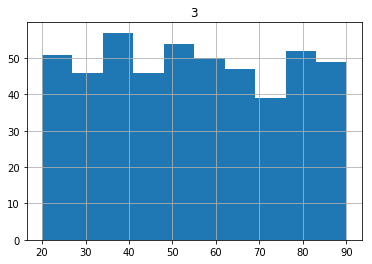

In [180]:
import matplotlib.pyplot as plt
df.hist(column='3')

In [181]:
column_range_filter('3', 20, 35)

0      False
1      False
2      False
3       True
4      False
5      False
6      False
7      False
8       True
9      False
10      True
11      True
12      True
13     False
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
       ...  
461    False
462    False
463    False
464    False
465     True
466    False
467    False
468    False
469     True
470    False
471     True
472     True
473    False
474     True
475    False
476    False
477    False
478    False
479    False
480     True
481    False
482    False
483    False
484     True
485    False
486    False
487     True
488    False
489     True
490    False
Name: 3, Length: 491, dtype: bool

In [182]:
column_filter('2', 'Basic')

0       True
1      False
2      False
3      False
4       True
5      False
6       True
7       True
8       True
9      False
10      True
11     False
12      True
13      True
14     False
15      True
16     False
17      True
18     False
19      True
20     False
21     False
22     False
23     False
24      True
25     False
26      True
27     False
28      True
29      True
       ...  
461    False
462     True
463    False
464     True
465    False
466     True
467     True
468    False
469    False
470     True
471    False
472    False
473     True
474     True
475     True
476     True
477     True
478    False
479    False
480    False
481     True
482     True
483     True
484     True
485    False
486    False
487    False
488    False
489    False
490    False
Name: 2, Length: 491, dtype: bool

In [183]:
Likelihood_Table_of_age

array([[0.21653543, 0.26582278, 0.27692308, 0.27956989],
       [0.26771654, 0.27848101, 0.23076923, 0.20430108],
       [0.2519685 , 0.17721519, 0.29230769, 0.2688172 ],
       [0.26377953, 0.27848101, 0.2       , 0.24731183]])

In [184]:
df['4'].value_counts()

40000     171
60000      93
80000      73
20000      50
120000     34
140000     32
100000     28
160000     10
Name: 4, dtype: int64

In [185]:
Likelihood_Table_of_income

array([[0.00393701, 0.60759494, 0.        , 0.01075269],
       [0.38976378, 0.11392405, 0.43076923, 0.37634409],
       [0.22440945, 0.10126582, 0.15384615, 0.19354839],
       [0.15748031, 0.07594937, 0.13846154, 0.19354839],
       [0.06299213, 0.02531646, 0.04615385, 0.07526882],
       [0.08661417, 0.03797468, 0.06153846, 0.05376344],
       [0.07480315, 0.02531646, 0.12307692, 0.03225806],
       [0.        , 0.01265823, 0.04615385, 0.06451613]])

In [186]:
dict_likelihood_marital_status

{'S': {'Basic': 0.5275590551181102,
  'Normal': 0.4810126582278481,
  'Silver': 0.5538461538461539,
  'Gold': 0.40860215053763443},
 'M': {'Basic': 0.47244094488188976,
  'Normal': 0.5189873417721519,
  'Silver': 0.4461538461538462,
  'Gold': 0.5913978494623656}}

In [187]:
dict_likelihood_age

{(20, 35): {'Basic': 0.21653543307086615,
  'Normal': 0.26582278481012656,
  'Silver': 0.27692307692307694,
  'Gold': 0.27956989247311825},
 (36, 53): {'Basic': 0.2677165354330709,
  'Normal': 0.27848101265822783,
  'Silver': 0.23076923076923078,
  'Gold': 0.20430107526881722},
 (54, 70): {'Basic': 0.25196850393700787,
  'Normal': 0.17721518987341772,
  'Silver': 0.2923076923076923,
  'Gold': 0.26881720430107525},
 (71, 90): {'Basic': 0.2637795275590551,
  'Normal': 0.27848101265822783,
  'Silver': 0.2,
  'Gold': 0.24731182795698925}}

In [188]:
dict_probability_member

{'Basic': 0.5173116089613035,
 'Normal': 0.16089613034623218,
 'Silver': 0.13238289205702647,
 'Gold': 0.1894093686354379}

In [189]:
list_of_predict

[[0.006147971947626945,
  0.0004931879549697817,
  0.0009807115238609956,
  0.0013786929229960352],
 [0.0, 2.0720239062319292e-05, 7.208496681736901e-05, 0.0004277822074459765],
 [0.0010932670966485349,
  0.0001900264029794283,
  0.00012904098998170994,
  6.614940792152695e-05],
 [0.0022910376657708266,
  0.0004837035712203628,
  0.0003871229699451298,
  0.0003258728727081538],
 [0.00540618297427239,
  0.0008011825770763461,
  0.0007982742621627161,
  0.0005178416195398661],
 [0.012669069166417433,
  0.0008080893234304525,
  0.002691172094515109,
  0.0014076594005700935],
 [0.0039742490120514345,
  0.0008251413861994425,
  0.0008903828308737985,
  0.0008472694690411995],
 [0.004919701934918406,
  0.0005700792089382848,
  0.0009032869298719696,
  0.0004630458554506886],
 [0.0024314375167871845,
  0.00017957540520676722,
  0.0007689063127186027,
  0.00012065652004886516],
 [0.003979170682654593,
  0.0005441665176229082,
  0.0010839443158463635,
  0.0006336416969325212],
 [0.0021870213889

In [190]:
list_of_answer

['Basic',
 'Silver',
 'Basic',
 'Normal',
 'Basic',
 'Silver',
 'Silver',
 'Silver',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Gold',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Normal',
 'Basic',
 'Gold',
 'Normal',
 'Silver',
 'Normal',
 'Basic',
 'Gold',
 'Basic',
 'Gold',
 'Normal',
 'Gold',
 'Basic',
 'Normal',
 'Basic',
 'Basic',
 'Gold',
 'Basic',
 'Basic',
 'Normal',
 'Silver',
 'Basic',
 'Basic',
 'Basic',
 'Silver',
 'Basic',
 'Normal',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Silver',
 'Silver',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Gold',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Normal',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Normal',
 'Silver',
 'Basic',
 'Gold',
 'Basic',
 'Basic',
 'Normal',
 'Silver',
 'Normal',
 'Gold',
 'Basic',
 'Silver',
 'Silver',
 'Silver',
 'Gold',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Basic',
 'Silver',
 'Basic',
 'Normal',
 'Gold',
 'Basic',
 'Basic',
 'Gold',
 'Basic',
 'Basic',
 'Ba